### Load Data and Filter Relevant Variables

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"  # Replace with the actual path to your dataset
df = pd.read_csv(file_path, low_memory=False)

# Filter relevant columns, excluding PSYCH_big_five_inventory_relaxed
columns_to_keep = [
    "WELLNESS_life_satisfaction",  # Life satisfaction
    "LONELY_dejong_emotional_social_loneliness_scale_emptiness",  # Emotional/social loneliness
    "CONNECTION_social_time_family_p7d",  # Hours spent with family
    "CONNECTION_social_time_friends_p7d",  # Hours spent with friends
    "CONNECTION_social_time_neighbours_p7d",  # Hours spent with neighbors
    "DEMO_age"  # Age column
]

df_filtered = df[columns_to_keep]

# Display basic statistics of the dataset
print("\nDataset shape before cleaning:")
print(df_filtered.shape)
print("\nMissing values per column before cleaning:")
print(df_filtered.isnull().sum())



Dataset shape before cleaning:
(11431, 6)

Missing values per column before cleaning:
WELLNESS_life_satisfaction                                   1832
LONELY_dejong_emotional_social_loneliness_scale_emptiness    2637
CONNECTION_social_time_family_p7d                            5435
CONNECTION_social_time_friends_p7d                           5449
CONNECTION_social_time_neighbours_p7d                        5527
DEMO_age                                                     1211
dtype: int64


### Drop Rows with Missing Values

In [2]:
# Drop rows with missing values for all selected variables
df_filtered.dropna(inplace=True)

# Verify the dataset shape after dropping missing values
print("\nDataset shape after dropping rows with missing values:")
print(df_filtered.shape)
print("\nMissing values per column after cleaning:")
print(df_filtered.isnull().sum())



Dataset shape after dropping rows with missing values:
(4626, 6)

Missing values per column after cleaning:
WELLNESS_life_satisfaction                                   0
LONELY_dejong_emotional_social_loneliness_scale_emptiness    0
CONNECTION_social_time_family_p7d                            0
CONNECTION_social_time_friends_p7d                           0
CONNECTION_social_time_neighbours_p7d                        0
DEMO_age                                                     0
dtype: int64


/tmp/ipykernel_53/3793238721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


### Mapping Non-Numeric Responses to Numeric Values

In [3]:
# Map for 'LONELY_dejong_emotional_social_loneliness_scale_emptiness'
loneliness_mapping = {
    "Yes": 1,            # Represents higher loneliness
    "More or less": 2,   # Moderate loneliness
    "No": 3              # Represents no loneliness (better state)
}

# Apply the mapping
df_filtered["LONELY_dejong_emotional_social_loneliness_scale_emptiness"] = df_filtered[
    "LONELY_dejong_emotional_social_loneliness_scale_emptiness"
].map(loneliness_mapping)

# Verify the mapping
print("\nSample rows after mapping non-numeric responses to numeric values:")
print(df_filtered["LONELY_dejong_emotional_social_loneliness_scale_emptiness"].head())



Sample rows after mapping non-numeric responses to numeric values:
0    1.0
1    3.0
2    3.0
3    1.0
5    3.0
Name: LONELY_dejong_emotional_social_loneliness_scale_emptiness, dtype: float64


/tmp/ipykernel_53/3399123812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LONELY_dejong_emotional_social_loneliness_scale_emptiness"] = df_filtered[


### Total Social Time

In [4]:
# Calculate Total Social Time by summing individual social time columns
df_filtered["total_social_time_p7d"] = (
    df_filtered["CONNECTION_social_time_family_p7d"] +
    df_filtered["CONNECTION_social_time_friends_p7d"] +
    df_filtered["CONNECTION_social_time_neighbours_p7d"]
)

# Verify the new column
print("\nSample rows with Total Social Time calculated:")
print(df_filtered[["total_social_time_p7d"]].head())

# Filter out rows where total_social_time_p7d exceeds 112 (average waking hours in a week)
df_filtered = df_filtered[df_filtered["total_social_time_p7d"] <= 112]

# Verify the dataset shape after filtering
print("\nDataset shape after removing rows with total_social_time_p7d > 112:")
print(df_filtered.shape)

# Check basic statistics for total_social_time_p7d
print("\nStatistics for total_social_time_p7d after filtering:")
print(df_filtered["total_social_time_p7d"].describe())




Sample rows with Total Social Time calculated:
   total_social_time_p7d
0                   15.0
1                   13.0
2                   12.0
3                   17.0
5                    4.0

Dataset shape after removing rows with total_social_time_p7d > 112:
(4492, 7)

Statistics for total_social_time_p7d after filtering:
count    4492.000000
mean       16.354185
std        18.649132
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       112.000000
Name: total_social_time_p7d, dtype: float64


/tmp/ipykernel_53/1530425873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["total_social_time_p7d"] = (


### Normalize Variables and Calculate Wellness Score

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define columns to normalize
columns_to_normalize = [
    "WELLNESS_life_satisfaction", 
    "LONELY_dejong_emotional_social_loneliness_scale_emptiness"
]

# Normalize relevant columns
df_filtered[columns_to_normalize] = scaler.fit_transform(df_filtered[columns_to_normalize])

# Calculate Wellness Score
df_filtered["Wellness_Score"] = (
    df_filtered["WELLNESS_life_satisfaction"] +
    df_filtered["LONELY_dejong_emotional_social_loneliness_scale_emptiness"]
) / 2

# Verify the Wellness Score
print("\nSample rows with Wellness Score calculated:")
print(df_filtered.shape)
print(df_filtered[["Wellness_Score"]].head())



Sample rows with Wellness Score calculated:
(4492, 8)
   Wellness_Score
0        0.055556
1        0.833333
2        0.722222
3        0.166667
5        0.833333


### Add Age Groups

In [8]:
# Define age groups
age_bins = [15, 24, 44, 64, 100]  # Adjust the bins as needed
age_labels = ["16-24", "25-44", "45-64", "65+"]

# Create a new column for age groups
df_filtered["age_group"] = pd.cut(df_filtered["DEMO_age"], bins=age_bins, labels=age_labels, right=True)

# Verify the age group distribution
print("\nAge group distribution:")
print(df_filtered["age_group"].value_counts())




Age group distribution:
age_group
45-64    1650
25-44    1390
65+      1121
16-24     331
Name: count, dtype: int64


### Final Data Set

In [7]:
print("\nFinal dataset shape:")
print(df_filtered.shape)

# Display a sample of the cleaned and processed dataset
print("\nSample of the final dataset:")
print(df_filtered.head())


Final dataset shape:
(4492, 9)

Sample of the final dataset:
   WELLNESS_life_satisfaction  \
0                    0.111111   
1                    0.666667   
2                    0.444444   
3                    0.333333   
5                    0.666667   

   LONELY_dejong_emotional_social_loneliness_scale_emptiness  \
0                                                0.0           
1                                                1.0           
2                                                1.0           
3                                                0.0           
5                                                1.0           

   CONNECTION_social_time_family_p7d  CONNECTION_social_time_friends_p7d  \
0                                8.0                                 6.0   
1                                8.0                                 4.0   
2                                2.0                                 9.0   
3                               10.0              

# Graphs

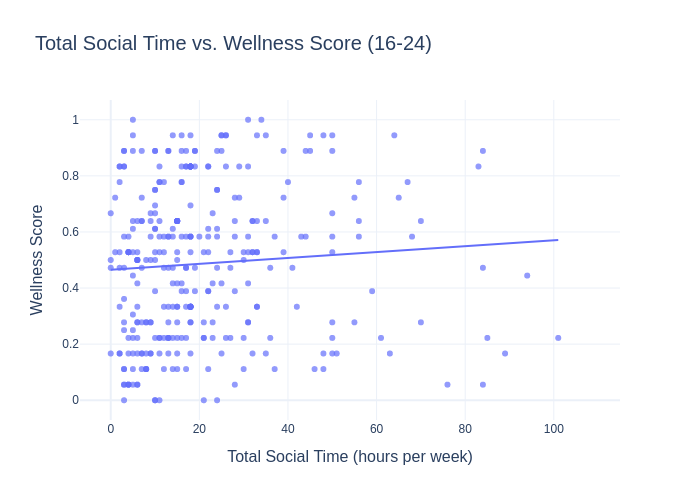

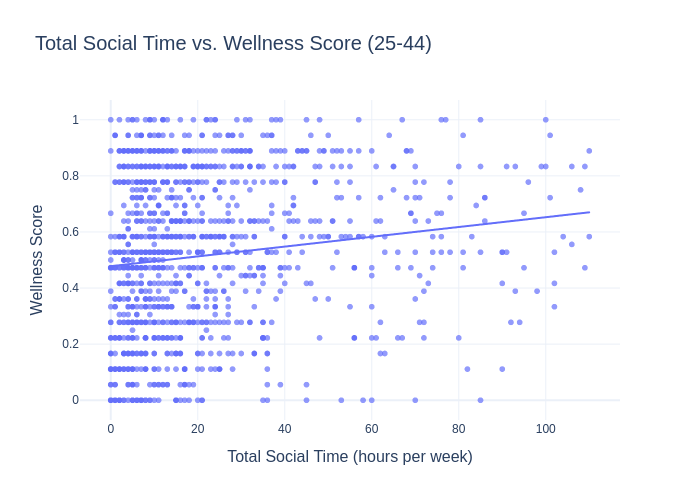

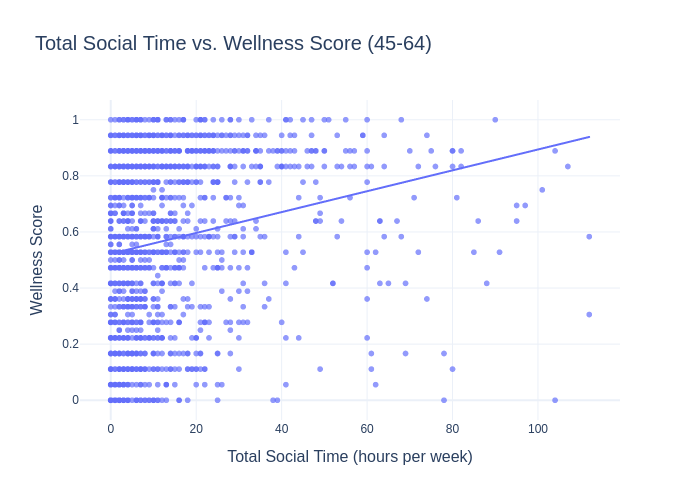

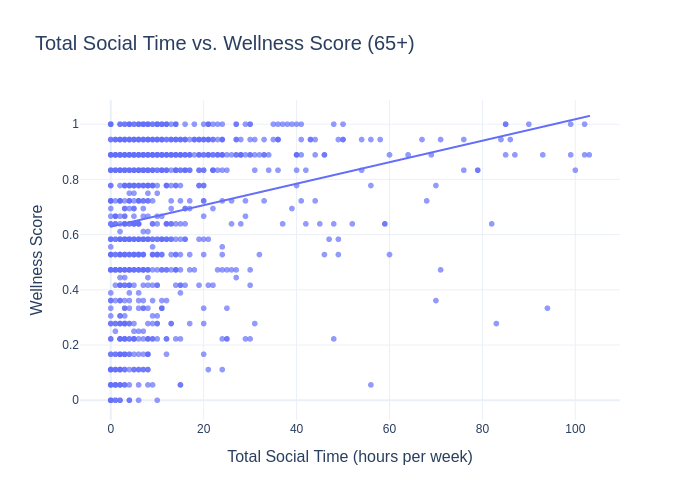

In [14]:
import plotly.express as px
import statsmodels.api as sm

# Function to create scatter plots with trendlines for each age group
def plot_with_trendline(data, age_group):
    # Filter data for the specific age group
    group_data = data[data["age_group"] == age_group]

    # Create a scatter plot with a trendline
    fig = px.scatter(
        group_data,
        x="total_social_time_p7d",
        y="Wellness_Score",
        trendline="ols",  # Add Ordinary Least Squares trendline
        title=f"Total Social Time vs. Wellness Score ({age_group})",
        labels={
            "total_social_time_p7d": "Total Social Time (hours per week)",
            "Wellness_Score": "Wellness Score"
        },
        template="plotly_white",
        opacity=0.7
    )

    # Update layout for better readability
    fig.update_layout(
        title_font_size=20,
        legend_title_font_size=14,
        xaxis_title_font_size=16,
        yaxis_title_font_size=16
    )

    # Show the plot with PNG rendering
    fig.show(renderer="png")

# Example usage for a specific age group
plot_with_trendline(df_filtered, "16-24")
plot_with_trendline(df_filtered, "25-44")
plot_with_trendline(df_filtered, "45-64")
plot_with_trendline(df_filtered, "65+")


### Hypothesis Testing

In [12]:
# Function to calculate R-squared for each age group
def calculate_r_squared(data, age_group):
    group_data = data[data["age_group"] == age_group]
    group_data = group_data.dropna(subset=["total_social_time_p7d", "Wellness_Score"])

    X = group_data["total_social_time_p7d"]
    y = group_data["Wellness_Score"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(f"R-squared for age group {age_group}: {model.rsquared:.4f}")

# Calculate R-squared for each age group
for age_group in ["16-24", "25-44", "45-64", "65+"]:
    calculate_r_squared(df_filtered, age_group)

    # Function to extract p-value from regression
def extract_p_value(data, age_group):
    # Filter data for the specific age group
    group_data = data[data["age_group"] == age_group]
    group_data = group_data.dropna(subset=["total_social_time_p7d", "Wellness_Score"])

    # Set up regression
    X = group_data["total_social_time_p7d"]
    y = group_data["Wellness_Score"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Extract and return the p-value
    p_value = model.pvalues["total_social_time_p7d"]
    return p_value

# Calculate p-values for each age group
for age_group in ["16-24", "25-44", "45-64", "65+"]:
    p_value = extract_p_value(df_filtered, age_group)
    print(f"P-value for {age_group}: {p_value:.4f}")


R-squared for age group 16-24: 0.0053
R-squared for age group 25-44: 0.0184
R-squared for age group 45-64: 0.0409
R-squared for age group 65+: 0.0508
P-value for 16-24: 0.1899
P-value for 25-44: 0.0000
P-value for 45-64: 0.0000
P-value for 65+: 0.0000


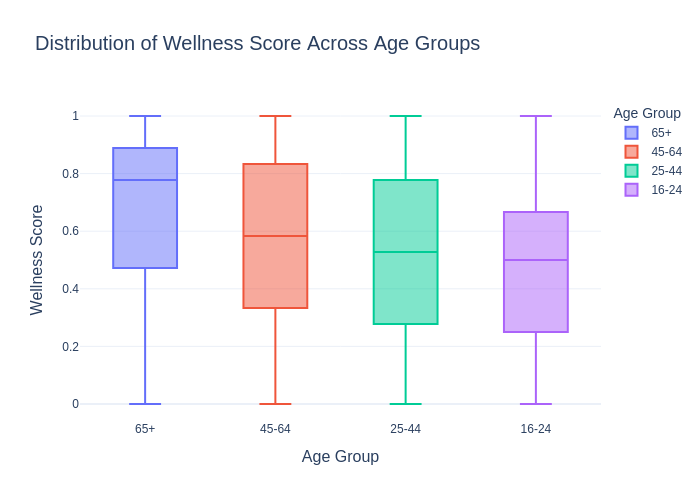

In [15]:
# Enhanced Box-and-Whisker Plot
fig = px.box(
    df_filtered,
    x="age_group",
    y="Wellness_Score",
    title="Distribution of Wellness Score Across Age Groups",
    labels={"age_group": "Age Group", "Wellness_Score": "Wellness Score"},
    color="age_group",  # Add color by age group
    template="plotly_white"
)

# Update layout for better readability
fig.update_layout(
    title_font_size=20,
    legend_title_font_size=14,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

# Show the plot with PNG rendering
fig.show(renderer="png")